In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
# -----------------------------
# Load Dataset
# -----------------------------
df = pd.read_csv('calories.csv')

In [3]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,Workout_Intensity,Steps_Count,Heart_Rate_Avg,Sleep_Hours,Water_Intake_Liters,Workout_Type,Body_Fat_Percentage,Resting_Heart_Rate,Daily_Active_Minutes
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0,26.038781,Medium,8421,130,4.2,2.8,Yoga,18.0,67,146
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0,21.773842,High,6925,150,7.3,2.0,Cardio,14.3,53,151
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0,24.655910,Medium,14202,147,5.5,2.4,Strength,24.2,78,52
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0,22.159109,Medium,4646,109,7.4,3.9,Yoga,29.9,57,34
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0,24.456063,Low,6309,74,8.6,2.5,HIIT,33.7,73,76


In [4]:
df.shape


(15000, 19)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   User_ID               15000 non-null  int64  
 1   Gender                15000 non-null  object 
 2   Age                   15000 non-null  int64  
 3   Height                15000 non-null  float64
 4   Weight                15000 non-null  float64
 5   Duration              15000 non-null  float64
 6   Heart_Rate            15000 non-null  float64
 7   Body_Temp             15000 non-null  float64
 8   Calories              15000 non-null  float64
 9   BMI                   15000 non-null  float64
 10  Workout_Intensity     15000 non-null  object 
 11  Steps_Count           15000 non-null  int64  
 12  Heart_Rate_Avg        15000 non-null  int64  
 13  Sleep_Hours           15000 non-null  float64
 14  Water_Intake_Liters   15000 non-null  float64
 15  Workout_Type       

In [6]:
df.describe()


,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,Steps_Count,Heart_Rate_Avg,Sleep_Hours,Water_Intake_Liters,Body_Fat_Percentage,Resting_Heart_Rate,Daily_Active_Minutes
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533,24.344900,11105.688333,109.309200,6.493920,2.501507,22.514407,69.384867,98.812867
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978,1.558784,5184.003190,28.985164,1.445544,0.864355,7.243108,11.493028,46.256088
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000,19.227688,2000.000000,60.000000,4.000000,1.000000,10.000000,50.000000,20.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000,23.243408,6623.750000,84.000000,5.200000,1.800000,16.200000,60.000000,59.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000,24.376731,11227.000000,110.000000,6.500000,2.500000,22.600000,69.000000,98.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000,25.492722,15597.250000,134.000000,7.800000,3.300000,28.800000,79.000000,139.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000,29.069767,19999.000000,159.000000,9.000000,4.000000,35.000000,89.000000,179.000000


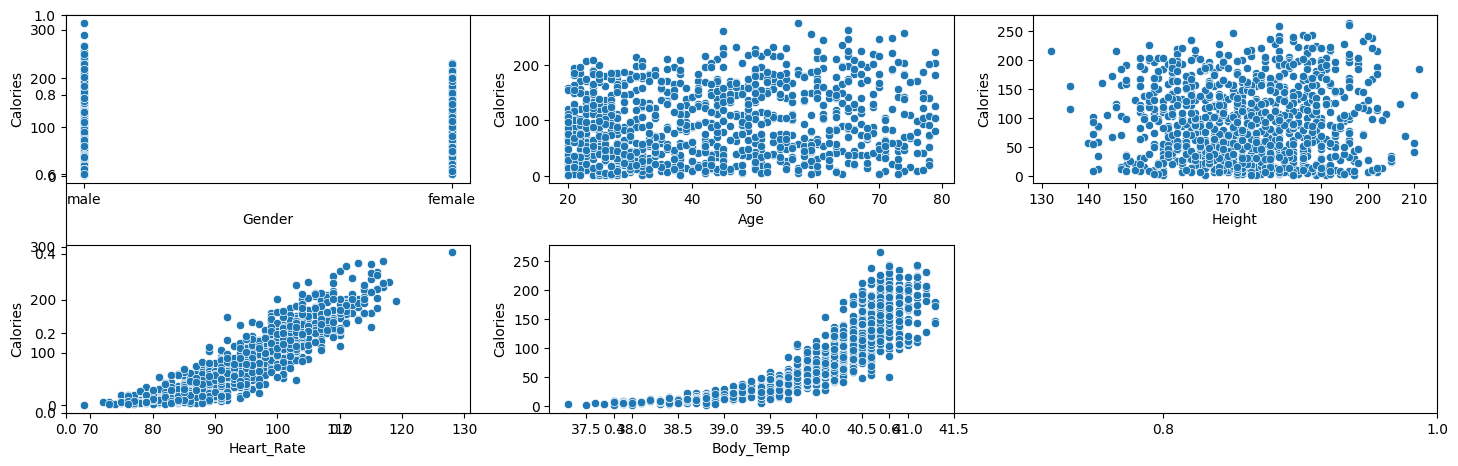

In [ ]:
"""import matplotlib.pyplot as plt
import seaborn as sb

# -----------------------------
# Basic Visualization
# -----------------------------
# The 'Weight' column was dropped in a previous step, so this plot will cause an error.
# sb.scatterplot(x='Height', y='Weight', data=df)
# plt.show()

# Update the features list to reflect the actual columns in the DataFrame
# The original DataFrame after dropping 'Weight' and 'Duration' has: User_ID, Gender, Age, Height, Heart_Rate, Body_Temp, Calories
# We will plot against Calories, so 'User_ID' and 'Calories' itself should not be in the features list for 'x' axis.
features = ['Gender', 'Age', 'Height', 'Heart_Rate', 'Body_Temp']

plt.subplots(figsize=(15, 5)) # Adjusted figsize for fewer plots
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1) # Adjusted grid to 2 rows, 3 columns
    x = df.sample(1000)
    sb.scatterplot(x=col, y='Calories', data=x)
plt.tight_layout()
plt.show()"""

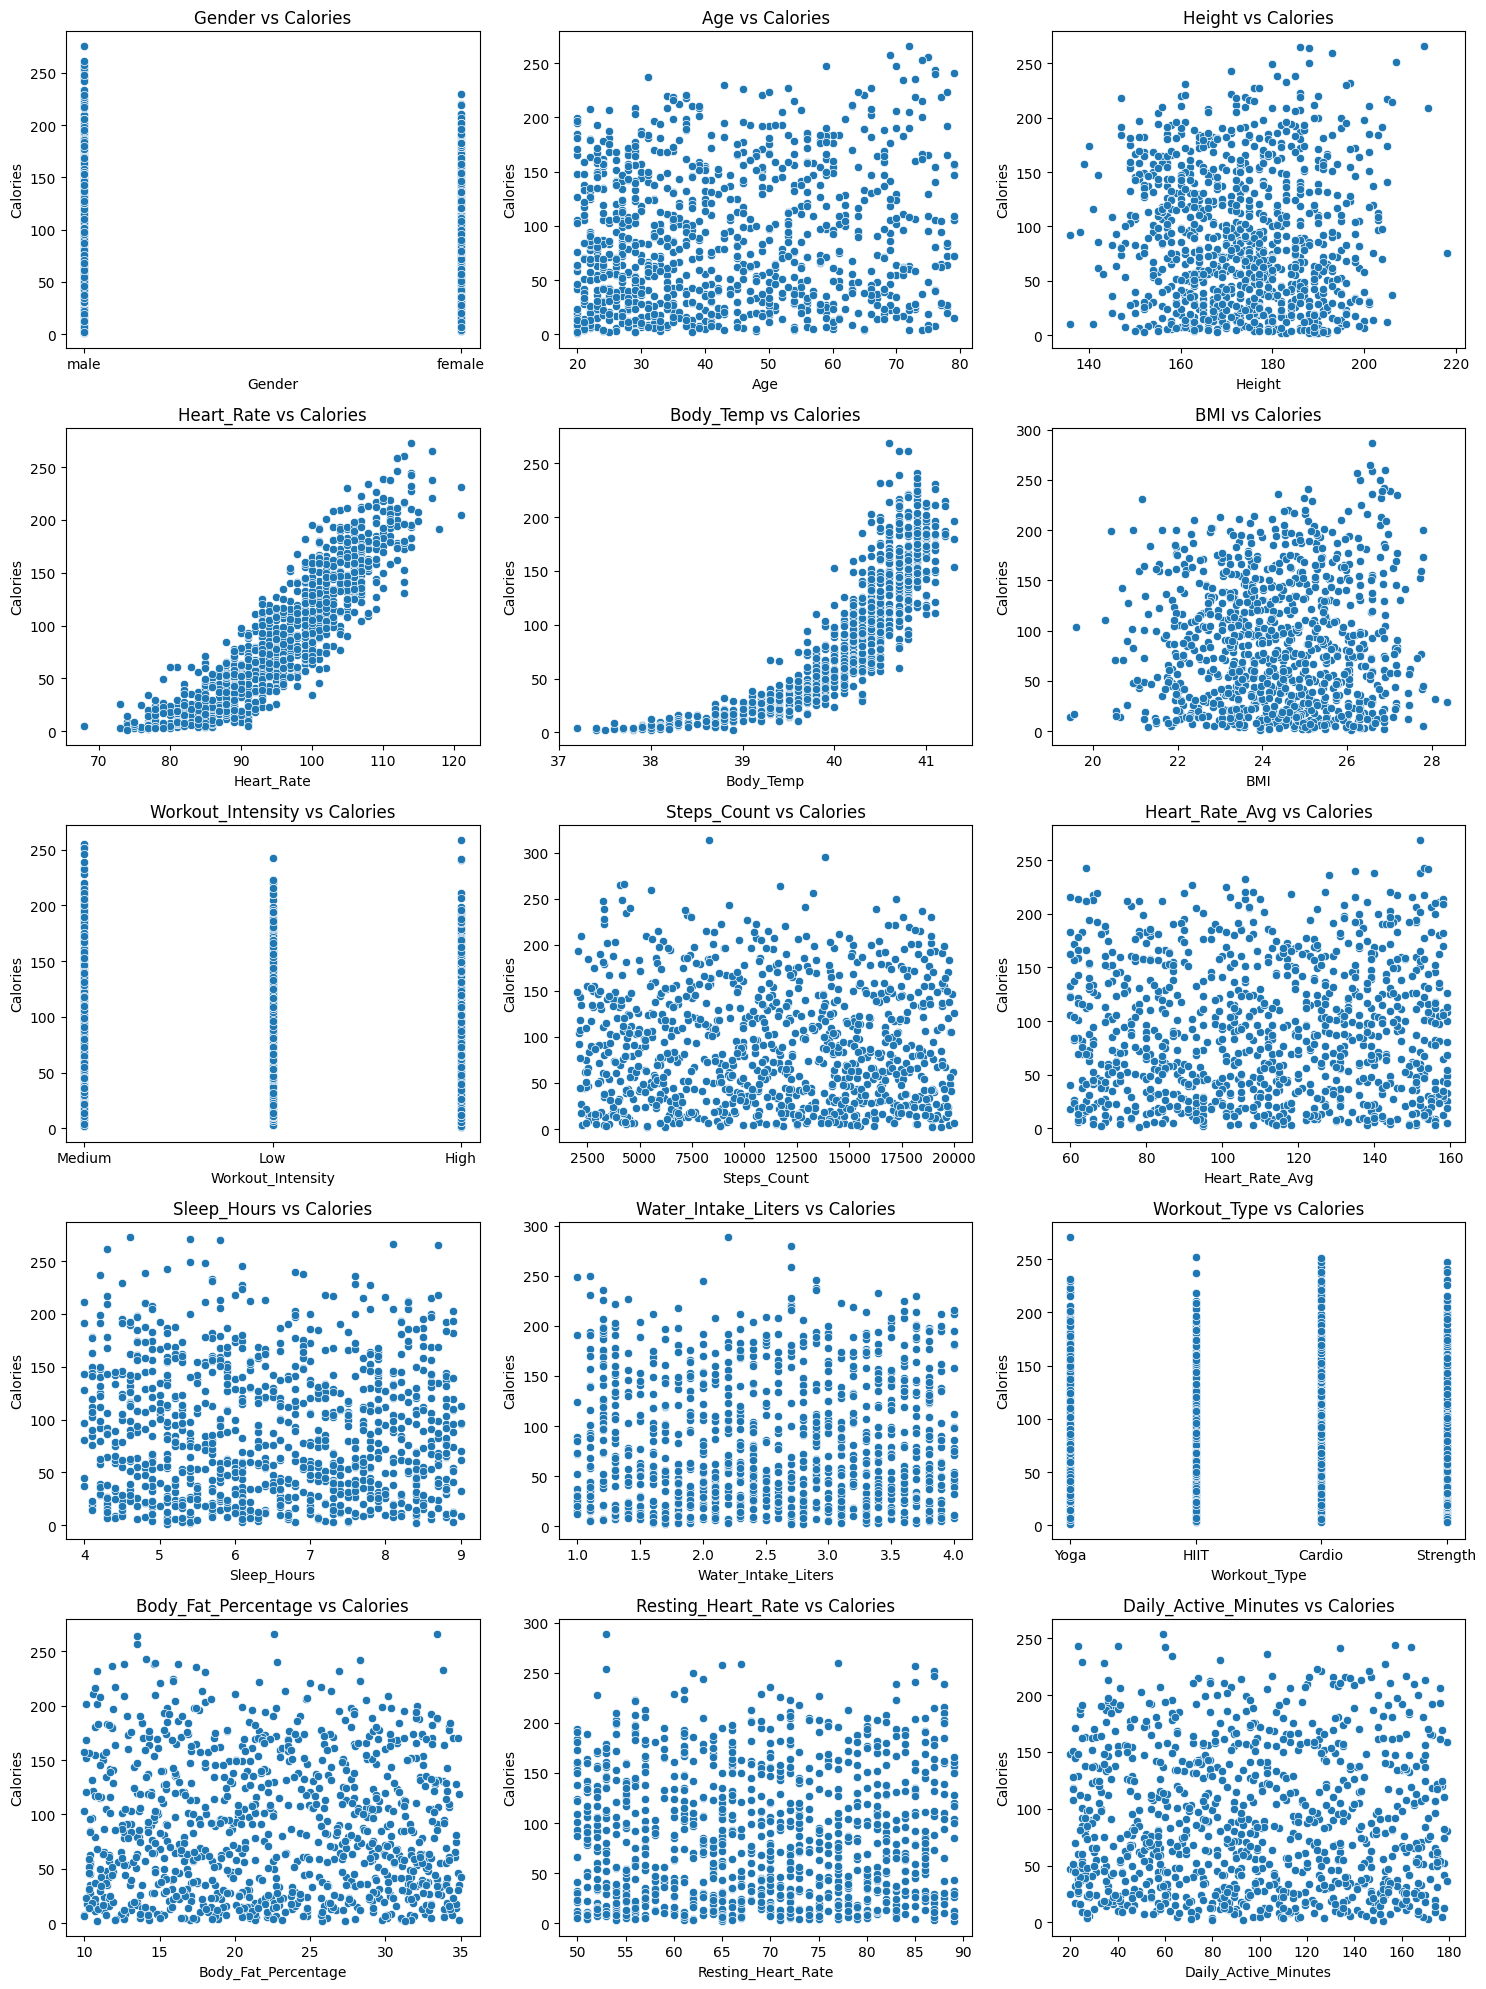

In [7]:
import matplotlib.pyplot as plt
import seaborn as sb
import math

# Drop Highly Correlated Features
# -----------------------------
#df.drop(['Weight', 'Duration'], axis=1, inplace=True) # These columns do not exist in the DataFrame


# -----------------------------
# Feature List (ALL FEATURES)
# -----------------------------
# Update features list to reflect columns actually present in df after dropping 'Weight' and 'Duration'
features = [
    'Gender',
    'Age',
    'Height',
    'Heart_Rate',
    'Body_Temp',
    'BMI',
    'Workout_Intensity',
    'Steps_Count',
    'Heart_Rate_Avg',
    'Sleep_Hours',
    'Water_Intake_Liters',
    'Workout_Type',
    'Body_Fat_Percentage',
    'Resting_Heart_Rate',
    'Daily_Active_Minutes'
]

# -----------------------------

# -----------------------------
# Scatter Plots vs Calories
# -----------------------------
num_features = len(features)
cols = 3
rows = math.ceil(num_features / cols)

plt.figure(figsize=(15, rows * 4))

for i, col in enumerate(features):
    plt.subplot(rows, cols, i + 1)
    sample_df = df.sample(1000)
    sb.scatterplot(x=col, y='Calories', data=sample_df)
    plt.title(f'{col} vs Calories')

plt.tight_layout()
plt.show()

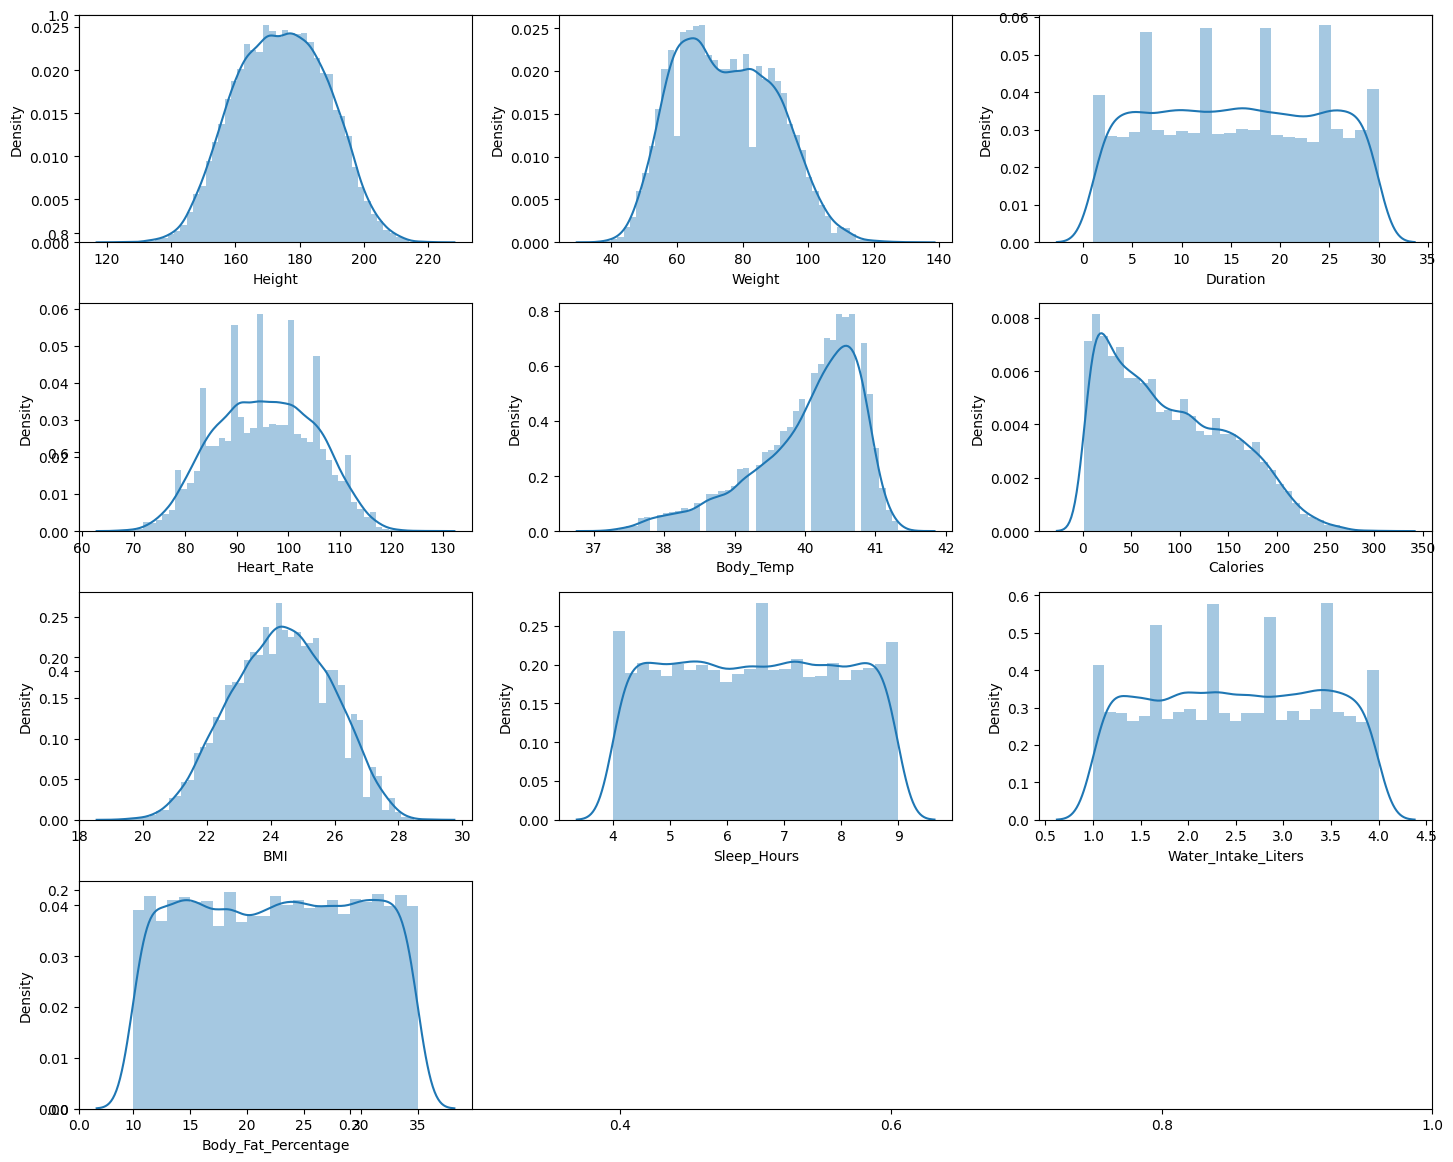

In [8]:
# -----------------------------
# Distribution Plots
# -----------------------------
float_features = df.select_dtypes(include='float').columns

plt.subplots(figsize=(15, 12)) # Adjusted figsize to better fit more plots
for i, col in enumerate(float_features):
    plt.subplot(4, 3, i + 1) # Changed grid from 3x3 to 4x3 to accommodate more features
    sb.distplot(df[col])
plt.tight_layout()
plt.show()

In [9]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Check missing values
print(df.isnull().sum())

User_ID                 0
Gender                  0
Age                     0
Height                  0
Weight                  0
Duration                0
Heart_Rate              0
Body_Temp               0
Calories                0
BMI                     0
Workout_Intensity       0
Steps_Count             0
Heart_Rate_Avg          0
Sleep_Hours             0
Water_Intake_Liters     0
Workout_Type            0
Body_Fat_Percentage     0
Resting_Heart_Rate      0
Daily_Active_Minutes    0
dtype: int64


In [10]:
# -----------------------------
# Encode Gender
# -----------------------------
df.replace({'male': 0, 'female': 1}, inplace=True)

In [11]:
from sklearn.preprocessing import LabelEncoder

le_intensity = LabelEncoder()
le_workout = LabelEncoder()

df['Workout_Intensity'] = le_intensity.fit_transform(df['Workout_Intensity'])
df['Workout_Type'] = le_workout.fit_transform(df['Workout_Type'])


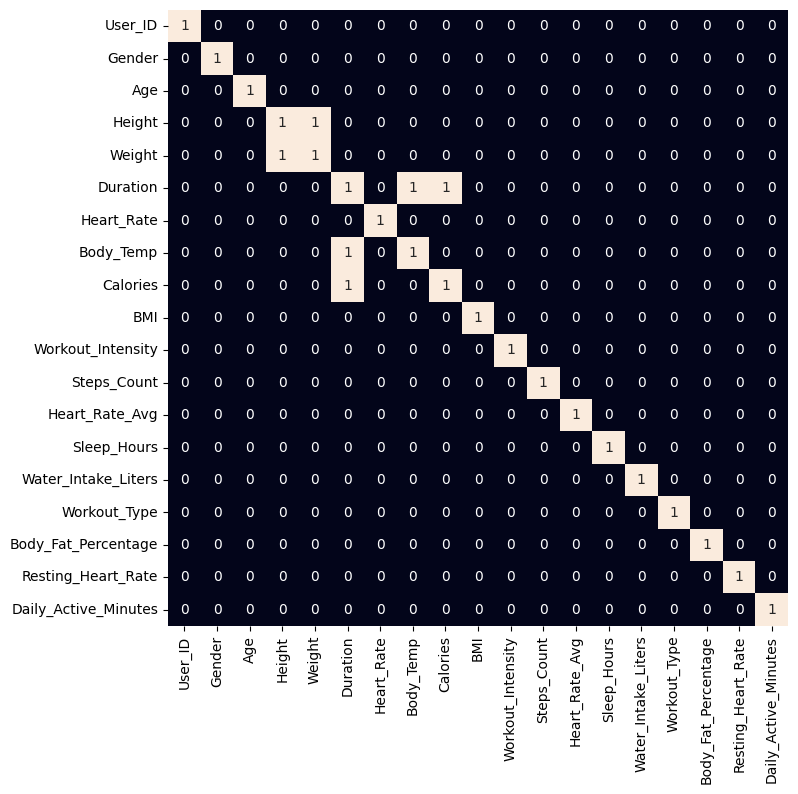

In [12]:
# -----------------------------
# Correlation Heatmap
# -----------------------------
plt.figure(figsize=(8, 8))
sb.heatmap(df.corr(numeric_only=True) > 0.9, annot=True, cbar=False)
plt.show()

In [27]:
# -----------------------------
# Drop Highly Correlated Features
# -----------------------------
df.drop(['Weight', 'Duration'], axis=1, inplace=True) # These columns do not exist in the DataFrame

In [28]:
# -----------------------------
# Feature–Target Split
# -----------------------------
X = df.drop(['User_ID', 'Calories', 'Workout_Intensity', 'Workout_Type'], axis=1)
y = df['Calories'].values

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.1, random_state=22
)

In [29]:
# -----------------------------
# Feature Scaling
# -----------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [30]:
# -----------------------------
# XGBoost Regression Model
# -----------------------------
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,  # Reduced learning rate
    max_depth=3,         # Further reduced from 4 to 3
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    gamma=0.2,           # Added gamma regularization
    min_child_weight=5,  # Increased min_child_weight
    random_state=42
)

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0.2, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=5, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [31]:
# -----------------------------
# Model Evaluation
# -----------------------------
train_preds = xgb_model.predict(X_train)
val_preds = xgb_model.predict(X_val)

print("XGBoost Regression Results")
print("---------------------------")
print("Training MAE :", mean_absolute_error(y_train, train_preds))
print("Validation MAE :", mean_absolute_error(y_val, val_preds))
print("Validation RMSE :", np.sqrt(mean_squared_error(y_val, val_preds)))
print("Validation R² Score :", r2_score(y_val, val_preds))

XGBoost Regression Results
---------------------------
Training MAE : 10.016796222022839
Validation MAE : 10.06340481621027
Validation RMSE : 14.105375837950916
Validation R² Score : 0.9476707701570269


In [32]:
# -----------------------------
# Percentage-based Performance
# -----------------------------
mean_calories = np.mean(y_val)

mae_val = mean_absolute_error(y_val, val_preds)
rmse_val = np.sqrt(mean_squared_error(y_val, val_preds))
r2_val = r2_score(y_val, val_preds)

mae_percentage = (mae_val / mean_calories) * 100
rmse_percentage = (rmse_val / mean_calories) * 100
r2_percentage = r2_val * 100

print("XGBoost Regression Performance (Percentage Form)")
print("------------------------------------------------")
print(f"MAE Percentage  : {mae_percentage:.2f}%")
print(f"RMSE Percentage : {rmse_percentage:.2f}%")
print(f"R² Score        : {r2_percentage:.2f}%")


XGBoost Regression Performance (Percentage Form)
------------------------------------------------
MAE Percentage  : 11.63%
RMSE Percentage : 16.31%
R² Score        : 94.77%


In [24]:
# -----------------------------
# User Input Prediction
# -----------------------------

def predict_calories():
    print("Enter user details to predict calories burned\n")

    age = float(input("Enter Age: "))
    height = float(input("Enter Height (cm): "))
    heart_rate = float(input("Enter Heart Rate: "))
    body_temp = float(input("Enter Body Temperature (C): "))

    gender_input = input("Enter Gender (male/female or 0 for male, 1 for female): ").lower()
    if gender_input == 'male' or gender_input == '0':
        gender = 0
    elif gender_input == 'female' or gender_input == '1':
        gender = 1
    else:
        print("Invalid gender input! Please enter 'male', 'female', '0', or '1'.")
        return

    # Create input array (same order as training data: Gender, Age, Height, Heart_Rate, Body_Temp)
    user_data = np.array([[gender, age, height, heart_rate, body_temp]])

    # Scale input
    user_data_scaled = scaler.transform(user_data)

    # Predict calories
    predicted_calories = xgb_model.predict(user_data_scaled)

    print("\nPredicted Calories Burned:")
    print(f"{predicted_calories[0]:.2f} calories")


# Call the function
predict_calories()

Enter user details to predict calories burned



KeyboardInterrupt: Interrupted by user

In [34]:
!pip install shap


In [35]:
import shap
import matplotlib.pyplot as plt


In [36]:
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_train)


 98%|===================| 13221/13500 [00:47<00:00]       

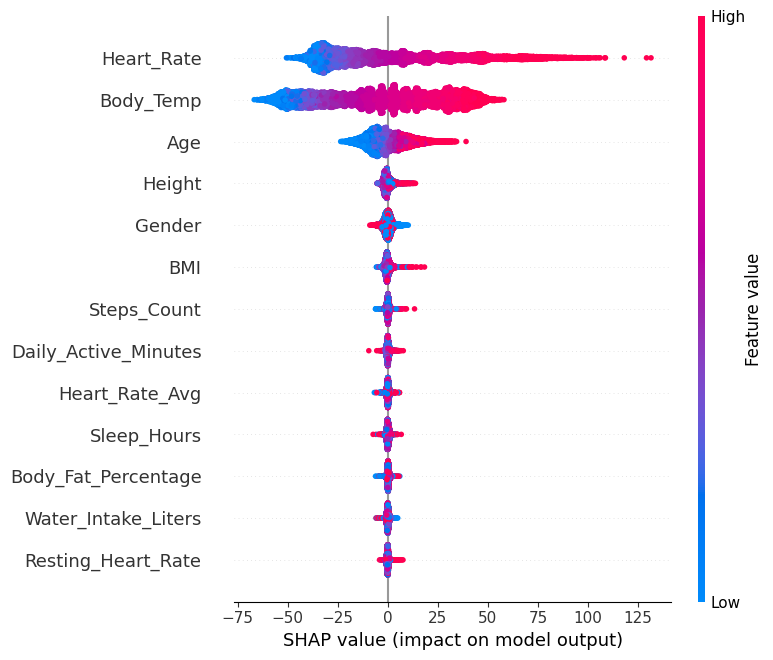

In [ ]:
shap.summary_plot(shap_values, X_train, feature_names=X.columns)


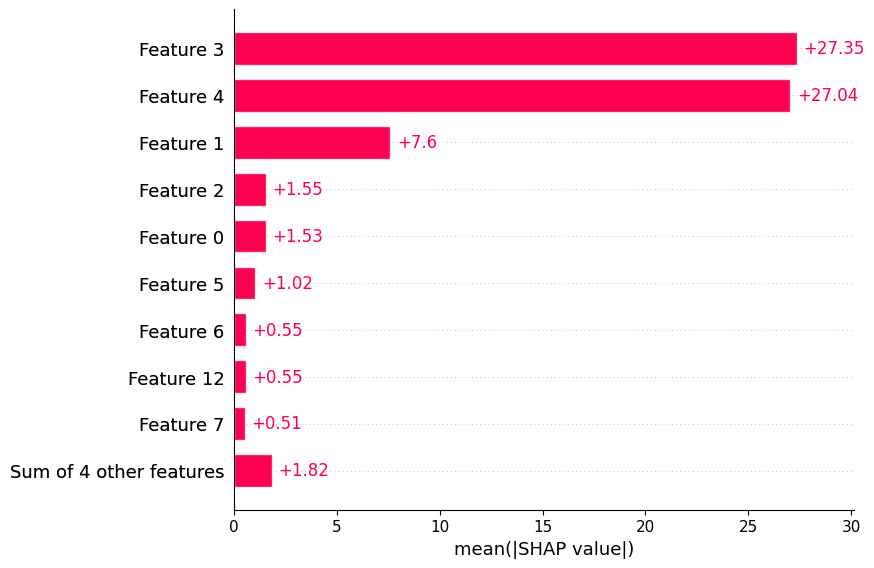

In [ ]:
shap.plots.bar(shap_values)


In [37]:
shap.initjs()

sample_index = 0
shap.force_plot(
    explainer.expected_value,
    shap_values[sample_index].values,
    X_train[sample_index],
    feature_names=X.columns
)


In [39]:
import pandas as pd

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

importance_df



,Feature,Importance
4,Body_Temp,0.494112
3,Heart_Rate,0.439096
1,Age,0.030267
0,Gender,0.014794
5,BMI,0.008342
2,Height,0.005496
12,Daily_Active_Minutes,0.001350
9,Water_Intake_Liters,0.001219
8,Sleep_Hours,0.001164
11,Resting_Heart_Rate,0.001132


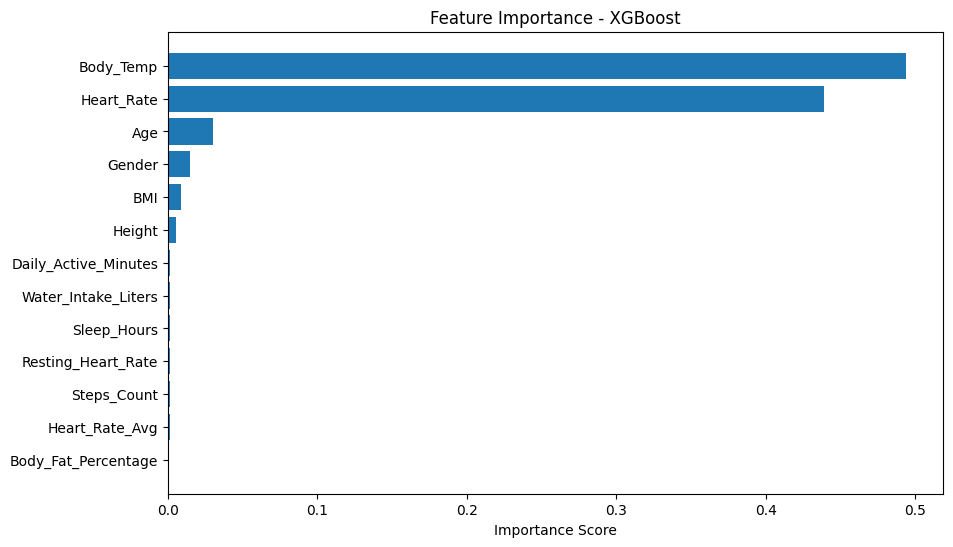

In [40]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance Score")
plt.show()


## **Streamlit**


In [44]:
import joblib

joblib.dump(xgb_model, "calories_model.pkl")
joblib.dump(scaler, "scaler.pkl")  # if you used scaling

['scaler.pkl']